# Importing Libraries

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading datasets
data = pd.read_csv('student_responses_2021.csv')
data1 = pd.read_csv('student_responses_2022.csv')

# Adding 'year' column to each dataset
data['year'] = 2021
data1['year'] = 2022

# Combining the datasets
combined_data = pd.concat([data, data1])

# Converting 'year' to categorical type
combined_data['year'] = combined_data['year'].astype('category')

combined_data.head()

,student_id,question_id,ability,difficulty,answered_correctly,year
0,967,40,-0.320326,1.572793,False,2021
1,135,2,-2.897524,-1.920777,False,2021
2,553,18,-1.207800,-0.482901,False,2021
3,564,29,-2.012802,0.360224,False,2021
4,449,42,0.332158,1.211066,False,2021


# EDA

In [64]:
combined_data.shape

(95000, 6)

In [65]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   student_id          95000 non-null  int64   
 1   question_id         95000 non-null  int64   
 2   ability             93100 non-null  float64 
 3   difficulty          93100 non-null  float64 
 4   answered_correctly  95000 non-null  bool    
 5   year                95000 non-null  category
dtypes: bool(1), category(1), float64(2), int64(2)
memory usage: 3.8 MB


In [66]:
combined_data.describe()

,student_id,question_id,ability,difficulty
count,95000.000000,95000.000000,93100.000000,93100.000000
mean,1026.815789,24.315789,0.154100,0.034364
std,576.753180,13.822452,2.326674,1.120549
min,1.000000,1.000000,-5.751698,-2.157522
25%,528.000000,12.000000,-1.277524,-0.870725
50%,1050.500000,24.000000,0.031228,-0.147794
75%,1525.250000,36.000000,1.559546,1.069916
max,2000.000000,50.000000,9.957734,2.194765


In [67]:
combined_data.isnull().sum()

student_id               0
question_id              0
ability               1900
difficulty            1900
answered_correctly       0
year                     0
dtype: int64

In [68]:
# Checking for missing values
print("Checking for missing values:")
print(combined_data.isnull().sum())

# Dropping rows with missing values
combined_data = combined_data.dropna()

# Ensuring data types are correct
combined_data['ability'] = combined_data['ability'].astype(float)
combined_data['difficulty'] = combined_data['difficulty'].astype(float)
combined_data['answered_correctly'] = combined_data['answered_correctly'].astype(int)


combined_data.shape

Checking for missing values:
student_id               0
question_id              0
ability               1900
difficulty            1900
answered_correctly       0
year                     0
dtype: int64


(91248, 6)

# Data Visualization

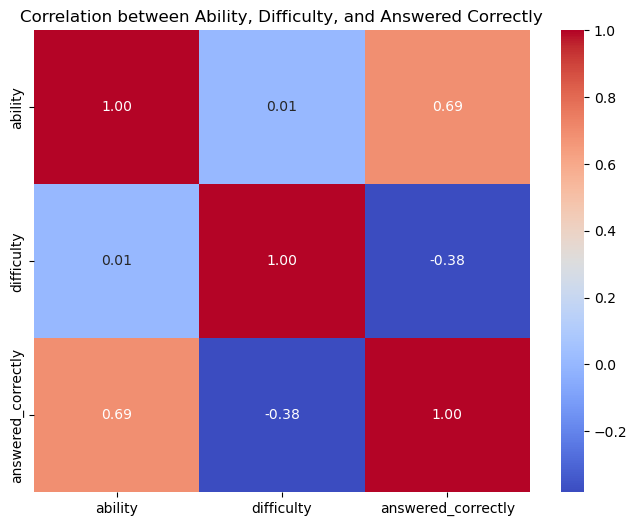

In [69]:
plt.figure(figsize=(8, 6))
correlation_matrix = combined_data[['ability', 'difficulty', 'answered_correctly']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation between Ability, Difficulty, and Answered Correctly")
plt.show()


Average Student Ability by Year:
year
2021   -0.042656
2022    0.327987
Name: ability, dtype: float64


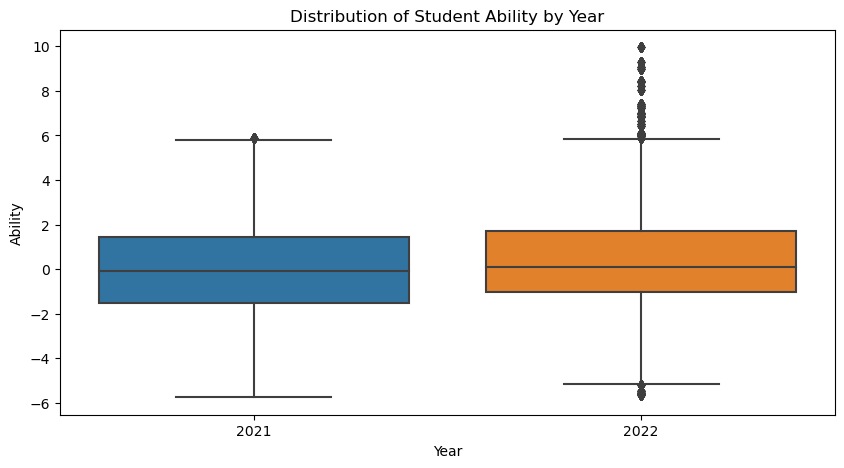

In [70]:

ability_by_year = combined_data.groupby('year')['ability'].mean()
print("\nAverage Student Ability by Year:")
print(ability_by_year)

# Plotting Ability Distribution by Year
plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='ability', data=combined_data)
plt.title('Distribution of Student Ability by Year')
plt.xlabel('Year')
plt.ylabel('Ability')
plt.show()



Average Question Difficulty by Year:
year
2021   -0.056763
2022    0.115973
Name: difficulty, dtype: float64


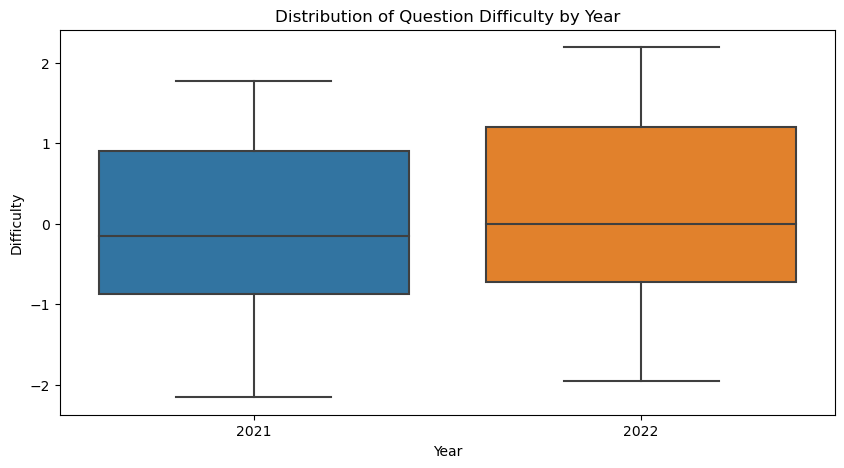

In [71]:

# Calculating average question difficulty by year
difficulty_by_year = combined_data.groupby('year')['difficulty'].mean()
print("\nAverage Question Difficulty by Year:")
print(difficulty_by_year)

# Ploting Difficulty Distribution by Year
plt.figure(figsize=(10, 5))
sns.boxplot(x='year', y='difficulty', data=combined_data)
plt.title('Distribution of Question Difficulty by Year')
plt.xlabel('Year')
plt.ylabel('Difficulty')
plt.show()


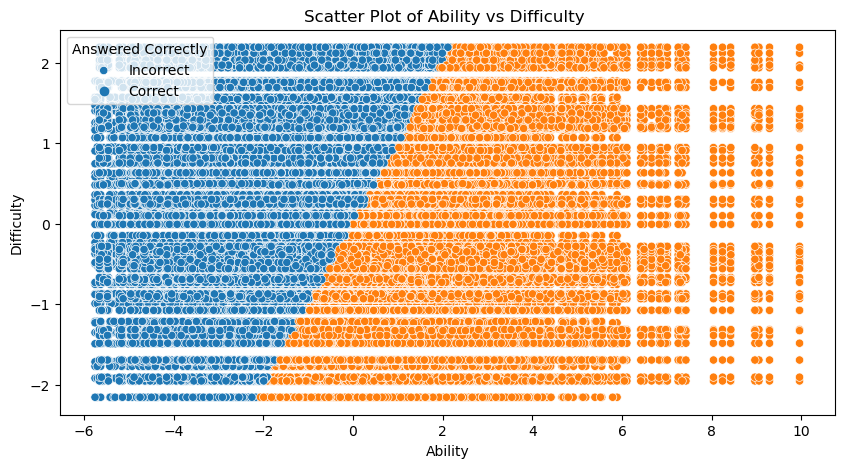

In [72]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='ability', y='difficulty', hue='answered_correctly', data=combined_data)
plt.title('Scatter Plot of Ability vs Difficulty ')
plt.xlabel('Ability')
plt.ylabel('Difficulty')
plt.legend(title="Answered Correctly", loc="upper left", labels=["Incorrect", "Correct"])
plt.show()

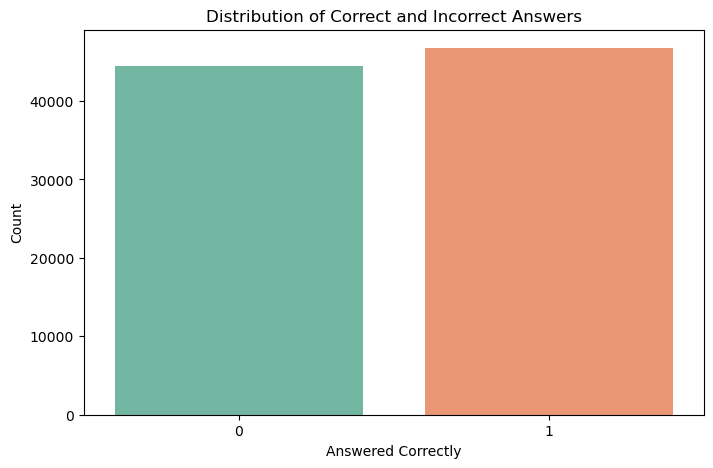

In [73]:
plt.figure(figsize=(8, 5))
sns.countplot(x='answered_correctly', data=combined_data, palette='Set2')
plt.title('Distribution of Correct and Incorrect Answers')
plt.xlabel('Answered Correctly')
plt.ylabel('Count')
plt.show()

# Model Building

In [74]:

# Selecting features and target variable
features = ['ability', 'difficulty']
target = 'answered_correctly'

# Splitting the data into training and test sets
X = combined_data[features]
y = combined_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a RandomForest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", conf_matrix)



Model Accuracy: 0.9993789954337899

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13347
           1       1.00      1.00      1.00     14028

    accuracy                           1.00     27375
   macro avg       1.00      1.00      1.00     27375
weighted avg       1.00      1.00      1.00     27375


Confusion Matrix:
 [[13336    11]
 [    6 14022]]


# Feature Importance


Feature Importance:
      Feature  Importance
0     ability    0.736374
1  difficulty    0.263626


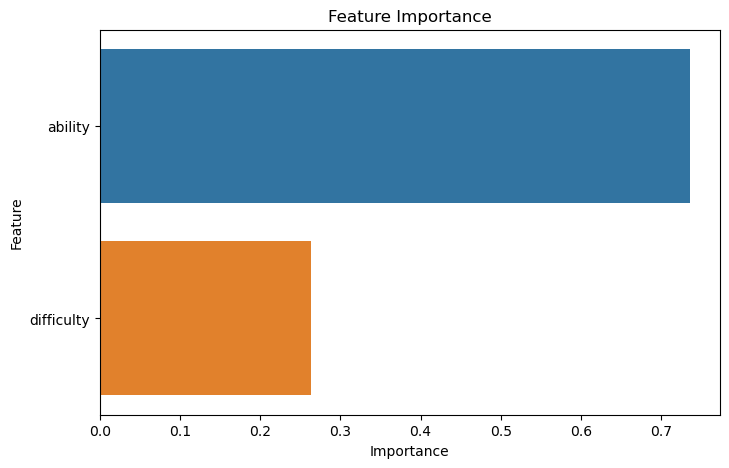

In [75]:

# Calculating and display feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Conclusion
Based on the analysis and model development on the provided student response data for 2021 and 2022, we derived the following insights:

## 1. How did the student's ability to answer the questions change?
- Average Ability Change: The average student ability score was computed for each year. An increase from 2021 to 2022 suggests students, on average, may have improved their ability to answer questions correctly.
- Distribution of Ability: The box plot of student ability across years highlights any shifts or spreads in ability, indicating if variability in skill levels changed over time.

### Observation: A significant upward trend or increased median would indicate improved abilities, while stable levels might suggest consistent skill across years.


# 2. Did the questions get difficult or easy?
- Average Difficulty Trend: The average difficulty level was calculated for each year. An increase suggests that questions may have become harder, while a decrease implies they became easier.
- Distribution of Difficulty: The box plot for question difficulty across years helps observe shifts in difficulty levels and whether questions were increasingly challenging or straightforward.
### Observation: A significant increase in difficulty might imply a deliberate change in question complexity, while stable or decreasing difficulty could suggest an effort to keep questions consistent or more accessible.

### Additional Observations About the Data
- Correlation Between Ability and Difficulty: Correlation analysis between ability and difficulty showed if students with higher ability tend to answer harder questions correctly. A positive correlation would suggest alignment of student skill with question complexity.
- Balance of Answered Correctly: Analysis of the distribution of answered_correctly revealed any class imbalance, which would impact model performance if one class (correct/incorrect) dominated. Balanced classes imply questions suited to student levels, while imbalance may indicate an alignment or mismatch in question complexity.
- Data Distribution and Outliers: Outliers in ability or difficulty could indicate extreme cases, such as very challenging questions or highly skilled students. Outliers can influence trends and model predictions, often necessitating special handling.